In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                    'data1' : np.random.randn(5),
                    'data2' : np.random.randn(5)})

In [4]:
df

,key1,key2,data1,data2
0,a,one,-0.176652,-1.397889
1,a,two,-0.080094,1.258166
2,b,one,-0.229187,0.968470
3,b,two,-0.581534,1.287649
4,a,one,0.227555,0.967030


In [5]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [6]:
grouped.mean()

key1
a   -0.00973
b   -0.40536
Name: data1, dtype: float64

变量grouped是一个GroupBy对象。它实际上还没有进行任何计算，只是含有一些有关分组键df['key1']的中间数据而已。换句话说，该对象已经有了接下来对各分组执行运算所需的一切信息。例如，我们可以调用GroupBy的mean方法来计算分组平均值：

In [7]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.025452
      two    -0.080094
b     one    -0.229187
      two    -0.581534
Name: data1, dtype: float64

In [8]:
means.unstack()

key2,one,two
key1,,
a,0.025452,-0.080094
b,-0.229187,-0.581534


In [9]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states,years]).mean()

California  2005   -0.080094
            2006   -0.229187
Ohio        2005   -0.379093
            2006    0.227555
Name: data1, dtype: float64

你可能已经注意到了，第一个例子在执行df.groupby('key1').mean()时，结果中没有key2列。这是因为df['key2']不是数值数据（俗称“麻烦列”），所以被从结果中排除了。默认情况下，所有数值列都会被聚合，虽然有时可能会被过滤为一个子集，稍后就会碰到。
无论你准备拿groupby做什么，都有可能会用到GroupBy的size方法，它可以返回一个含有分组大小的Series

In [10]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.176652 -1.397889
1    a  two -0.080094  1.258166
4    a  one  0.227555  0.967030
b
  key1 key2     data1     data2
2    b  one -0.229187  0.968470
3    b  two -0.581534  1.287649


In [11]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.176652 -1.397889
4    a  one  0.227555  0.967030
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.080094  1.258166
('b', 'one')
  key1 key2     data1    data2
2    b  one -0.229187  0.96847
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.581534  1.287649


In [12]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,-0.229187,0.968470
3,b,two,-0.581534,1.287649


groupby默认是在axis=0上进行分组的，通过设置也可以在其他任何轴上进行分组。拿上面例子中的df来说，我们可以根据dtype对列进行分组：

In [13]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [14]:
grouped = df.groupby(df.dtypes,axis=1)
for dtype,group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.176652 -1.397889
1 -0.080094  1.258166
2 -0.229187  0.968470
3 -0.581534  1.287649
4  0.227555  0.967030
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [15]:
df.groupby('key1')['data1']

In [16]:
df.groupby('key1')[['data2']]

In [17]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.215429
     two   1.258166
b    one   0.968470
     two   1.287649

In [18]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped.mean()

key1  key2
a     one    -0.215429
      two     1.258166
b     one     0.968470
      two     1.287649
Name: data2, dtype: float64

In [19]:
people = pd.DataFrame(np.random.randn(5,5),
                     columns=['a','b','c','d','e'],
                     index = ['Joe','Steve','Wes','Jim','Travis'])
people.iloc[2:3,[1,2]] = np.nan

In [20]:
people

,a,b,c,d,e
Joe,1.695565,0.892118,0.938016,0.629284,-1.024997
Steve,-0.254607,-0.610616,-0.882124,0.132203,-0.154213
Wes,0.762676,NaN,NaN,-0.892932,0.181315
Jim,0.778889,1.444943,-0.290325,0.666808,1.984156
Travis,-1.230115,-0.631463,-0.603791,0.429823,-0.146918


In [21]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
        'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [22]:
by_column = people.groupby(mapping,axis=1)

In [23]:
by_column.sum()

,blue,red
Joe,1.567300,1.562686
Steve,-0.749921,-1.019436
Wes,-0.892932,0.943991
Jim,0.376483,4.207988
Travis,-0.173968,-2.008496


In [24]:
map_series = pd.Series(mapping)

In [25]:
 map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [26]:
people.groupby(map_series,axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [27]:
 people.groupby(len).sum()

,a,b,c,d,e
3,3.237131,2.337061,0.647691,0.403160,1.140474
5,-0.254607,-0.610616,-0.882124,0.132203,-0.154213
6,-1.230115,-0.631463,-0.603791,0.429823,-0.146918


In [28]:
df

,key1,key2,data1,data2
0,a,one,-0.176652,-1.397889
1,a,two,-0.080094,1.258166
2,b,one,-0.229187,0.968470
3,b,two,-0.581534,1.287649
4,a,one,0.227555,0.967030


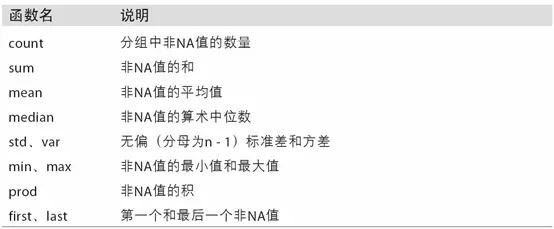

In [29]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.166025
b   -0.264422
Name: data1, dtype: float64

In [30]:
def peak_to_peak(arr):
    return arr.max()-arr.min()

In [31]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.404207,2.656054
b,0.352347,0.319179


你可能注意到注意，有些方法（如describe）也是可以用在这里的，即使严格来讲，它们并非聚合运算：

In [32]:
grouped.describe()

data1                                                             \
     count     mean       std       min       25%       50%       75%   
key1                                                                    
a      3.0 -0.00973  0.211090 -0.176652 -0.128373 -0.080094  0.073730   
b      2.0 -0.40536  0.249147 -0.581534 -0.493447 -0.405360 -0.317274   

               data2                                                   \
           max count      mean       std       min       25%      50%   
key1                                                                    
a     0.227555   3.0  0.275769  1.456722 -1.397889 -0.215429  0.96703   
b    -0.229187   2.0  1.128060  0.225694  0.968470  1.048265  1.12806   

                          
           75%       max  
key1                      
a     1.112598  1.258166  
b     1.207855  1.287649

In [33]:
tips = pd.read_csv('examples/tips.csv')

In [34]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [35]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


你已经看到，对Series或DataFrame列的聚合运算其实就是使用aggregate（使用自定义函数）或调用诸如mean、std之类的方法。然而，你可能希望对不同的列使用不同的聚合函数，或一次应用多个函数。其实这也好办，我将通过一些示例来进行讲解。首先，我根据天和smoker对tips进行分组：


In [39]:
grouped = tips.groupby(['day', 'smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [40]:
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

这里，我们传递了一组聚合函数进行聚合，独立对数据分组进行评估。
你并非一定要接受GroupBy自动给出的那些列名，特别是lambda函数，它们的名称是'<lambda>'，这样的辨识度就很低了（通过函数的name属性看看就知道了）。因此，如果传入的是一个由(name,function)元组组成的列表，则各元组的第一个元素就会被用作DataFrame的列名（可以将这种二元元组列表看做一个有序映射）：

In [41]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [42]:
functions = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [43]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [44]:
ftuples = [('Durchschnitt','mean'),('Abweichung',np.var)]
grouped['tip_pct','total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [45]:
grouped.agg({'tip':np.max,'size':'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [46]:
grouped.agg({'tip_pct':['min','max','mean','std'],
            'size':'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [47]:
tips.groupby(['day','smoker'],as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


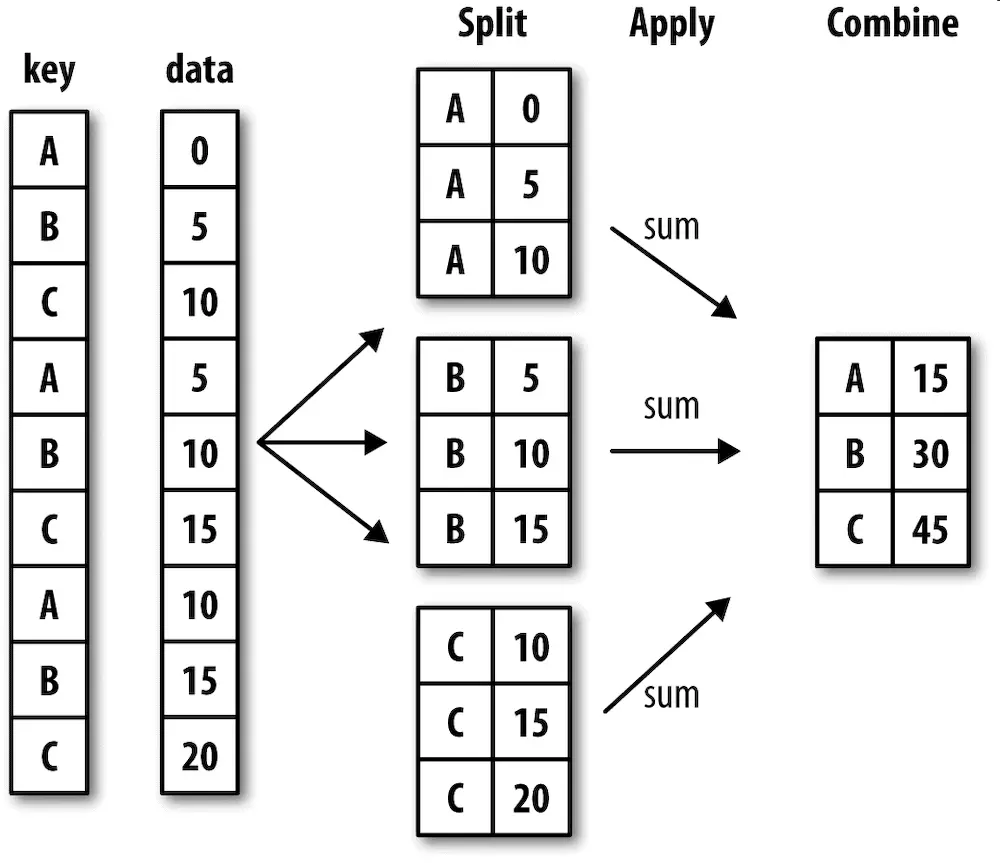

In [52]:
def top(df,n=5,column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips,n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [53]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [55]:
tips.groupby(['smoker','day']).apply(top,n=1,column = 'total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [56]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [57]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [58]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [59]:
f = lambda x:x.describe()
grouped.apply(f)

total_bill        tip       size    tip_pct
day  smoker                                                   
Fri  No     count    4.000000   4.000000   4.000000   4.000000
            mean    18.420000   2.812500   2.250000   0.151650
            std      5.059282   0.898494   0.500000   0.028123
            min     12.460000   1.500000   2.000000   0.120385
            25%     15.100000   2.625000   2.000000   0.137239
            50%     19.235000   3.125000   2.000000   0.149241
            75%     22.555000   3.312500   2.250000   0.163652
            max     22.750000   3.500000   3.000000   0.187735
     Yes    count   15.000000  15.000000  15.000000  15.000000
            mean    16.813333   2.714000   2.066667   0.174783
            std      9.086388   1.077668   0.593617   0.051293
            min      5.750000   1.000000   1.000000   0.103555
            25%     11.690000   1.960000   2.000000   0.133739
            50%     13.420000   2.500000   2.000000   0.173913
            75%     18.665000   3.240000   2.000000   0.209240
            max     40.170000   4.730000   4.000000   0.263480
Sat  No     count   45.000000  45.000000  45.000000  45.000000
            mean    19.661778   3.102889   2.555556   0.158048
            std      8.939181   1.642088   0.784960   0.039767
            min      7.250000   1.000000   1.000000   0.056797
            25%     14.730000   2.010000   2.000000   0.136240
            50%     17.820000   2.750000   2.000000   0.150152
            75%     20.650000   3.390000   3.000000   0.183915
            max     48.330000   9.000000   4.000000   0.291990
     Yes    count   42.000000  42.000000  42.000000  42.000000
            mean    21.276667   2.875476   2.476190   0.147906
            std     10.069138   1.630580   0.862161   0.061375
            min      3.070000   1.000000   1.000000   0.035638
            25%     13.405000   2.000000   2.000000   0.091797
            50%     20.390000   2.690000   2.000000   0.153624
...                       ...        ...        ...        ...
Sun  No     std      8.130189   1.224785   1.032674   0.042347
            min      8.770000   1.010000   2.000000   0.059447
            25%     14.780000   2.000000   2.000000   0.139780
            50%     18.430000   3.020000   3.000000   0.161665
            75%     25.000000   3.920000   4.000000   0.185185
            max     48.170000   6.000000   6.000000   0.252672
     Yes    count   19.000000  19.000000  19.000000  19.000000
            mean    24.120000   3.516842   2.578947   0.187250
            std     10.442511   1.261151   0.901591   0.154134
            min      7.250000   1.500000   2.000000   0.065660
            25%     17.165000   3.000000   2.000000   0.097723
            50%     23.100000   3.500000   2.000000   0.138122
            75%     32.375000   4.000000   3.000000   0.215325
            max     45.350000   6.500000   5.000000   0.710345
Thur No     count   45.000000  45.000000  45.000000  45.000000
            mean    17.113111   2.673778   2.488889   0.160298
            std      7.721728   1.282964   1.179796   0.038774
            min      7.510000   1.250000   1.000000   0.072961
            25%     11.690000   1.800000   2.000000   0.137741
            50%     15.950000   2.180000   2.000000   0.153492
            75%     20.270000   3.000000   2.000000   0.184843
            max     41.190000   6.700000   6.000000   0.266312
     Yes    count   17.000000  17.000000  17.000000  17.000000
            mean    19.190588   3.030000   2.352941   0.163863
            std      8.355149   1.113491   0.701888   0.039389
            min     10.340000   2.000000   2.000000   0.090014
            25%     13.510000   2.000000   2.000000   0.148038
            50%     16.470000   2.560000   2.000000   0.153846
            75%     19.810000   4.000000   2.000000   0.194837
            max     43.110000   5.000000   4.000000   0.241255

[64 rows x 4 columns]

In [60]:
tips.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [61]:
frame = pd.DataFrame({'data1':np.random.randn(1000),
                     'data2':np.random.randn(1000)})
quartiles = pd.cut(frame.data1,4)

In [62]:
quartiles[:10]

0      (0.355, 2.112]
1      (0.355, 2.112]
2     (-1.401, 0.355]
3      (0.355, 2.112]
4    (-3.164, -1.401]
5      (0.355, 2.112]
6      (0.355, 2.112]
7    (-3.164, -1.401]
8     (-1.401, 0.355]
9      (0.355, 2.112]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.164, -1.401] < (-1.401, 0.355] < (0.355, 2.112] < (2.112, 3.868]]

In [63]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),
           'count':group.count(),'mean':group.mean()}
grouped = frame.data2.groupby(quartiles)

In [65]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.164, -1.401]",76.0,3.081652,0.107222,-2.643160
"(-1.401, 0.355]",544.0,3.233220,-0.009902,-2.435213
"(0.355, 2.112]",357.0,3.156986,0.105896,-2.187243
"(2.112, 3.868]",23.0,2.722517,-0.217320,-2.273652


In [66]:
grouping = pd.qcut(frame.data1,10,labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,3.081652,0.030336,-2.643160
1,100.0,2.157067,0.080978,-2.127358
2,100.0,2.449734,-0.095476,-2.269118
3,100.0,3.233220,-0.099231,-2.147288
4,100.0,2.793816,0.085753,-2.435213
5,100.0,2.369594,-0.043895,-2.096677
6,100.0,2.523241,0.229869,-1.864703
7,100.0,2.429501,0.137522,-2.187243
8,100.0,2.580776,-0.048434,-1.763647


In [67]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    0.296289
2         NaN
3   -0.219517
4         NaN
5    1.463198
dtype: float64

In [68]:
s.fillna(s.mean())

0    0.513323
1    0.296289
2    0.513323
3   -0.219517
4    0.513323
5    1.463198
dtype: float64

In [69]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
           'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4+['West'] * 4
data = pd.Series(np.random.randn(8),index=states)
data

Ohio          0.878516
New York      0.921953
Vermont       1.382483
Florida      -0.748265
Oregon       -0.362849
Nevada        0.808578
California   -0.913996
Idaho        -1.979071
dtype: float64

In [70]:
data[['Vermont','Nevada','Idaho']] = np.nan
data

Ohio          0.878516
New York      0.921953
Vermont            NaN
Florida      -0.748265
Oregon       -0.362849
Nevada             NaN
California   -0.913996
Idaho              NaN
dtype: float64

In [71]:
data.groupby(group_key).mean()

East    0.350735
West   -0.638423
dtype: float64

In [72]:
fill_mean = lambda g:g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.878516
New York      0.921953
Vermont       0.350735
Florida      -0.748265
Oregon       -0.362849
Nevada       -0.638423
California   -0.913996
Idaho        -0.638423
dtype: float64

In [ ]:
fill_values = {'East':0.5,'West':-1}
fill_fuc = lambda g:g.fillna(fill_values[])